In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
img = cv2.imread('building_original.tif')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# 2. openCV의 GaussianBlur 함수를 이용해 원래 이미지에 blur 처리
gaublur = cv2.GaussianBlur(img, (5,5),0)

# 3. 2의 결과를 결과를 0~1까지 float 형으로 normalization
norm = cv2.normalize(gaublur, None, 0, 1, cv2.NORM_MINMAX)

# 4. Sobel kernel의 x와 y mask를 이용하여 Step3의 결과에 대한 x방향과 y방향 gradient image 생성
# 참고 : https://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220506567638&parentCategoryNo=&categoryNo=66&viewDate=&isShowPopularPosts=true&from=search
sobel_x = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobel_y = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

# 5. 4에서 구한 2개의 결과를 각각 절대값으로 만든 후 더함
absobel_x = np.abs(sobel_x)
absobel_y = np.abs(sobel_y)
sobel = absobel_x + absobel_y

#6. Threshold를 지정해 Step5의 결과에서 Threshold를 넘으면 255, 안 넘으면 0이 되는 matrix 생성
# 참고 : https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html

orthreshold,mask1 = cv2.threshold(sobel, 130, 255, cv2.THRESH_BINARY)
threshold_x,mask2 = cv2.threshold(sobel_x, 90, 255, cv2.THRESH_BINARY)
threshold_y,mask3 = cv2.threshold(sobel_y, 90, 255, cv2.THRESH_BINARY)
threshold,mask4 = cv2.threshold(sobel, 90, 255, cv2.THRESH_BINARY)


(-0.5, 1113.5, 833.5, -0.5)

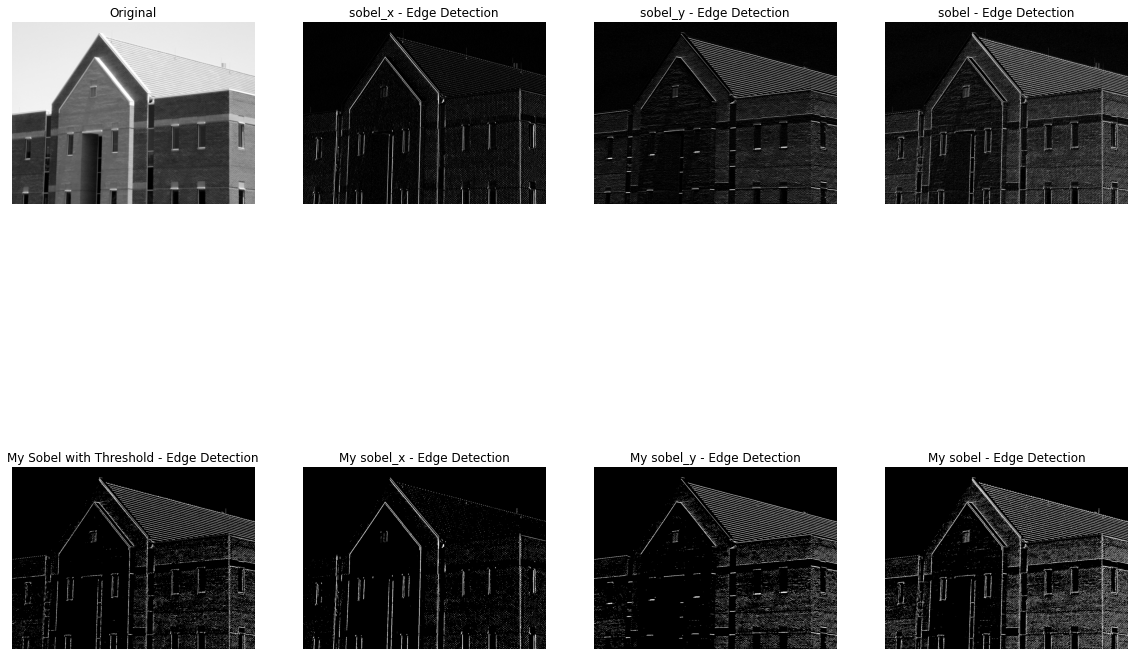

In [27]:
fig = plt.figure(figsize = (20, 15)) 
rows = 2
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(gaublur, cmap='gray')
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(sobel_x, cmap='gray')
ax2.set_title('sobel_x - Edge Detection')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(sobel_y, cmap='gray')
ax3.set_title('sobel_y - Edge Detection')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(sobel, cmap='gray')
ax4.set_title('sobel - Edge Detection')
ax4.axis("off")

##
ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(mask1, cmap='gray')
ax5.set_title('My Sobel with Threshold - Edge Detection')
ax5.axis("off")

ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow(mask2, cmap='gray')
ax6.set_title('My sobel_x - Edge Detection')
ax6.axis("off")

ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow(mask3, cmap='gray')
ax7.set_title('My sobel_y - Edge Detection')
ax7.axis("off")

ax8 = fig.add_subplot(rows, cols, 8)
ax8.imshow(mask4, cmap='gray')
ax8.set_title('My sobel - Edge Detection')
ax8.axis("off")

